In [33]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from scipy import stats

In [2]:
PizzaHut = pd.read_csv('PizzaHut.csv')
PizzaHut.describe().head()

,latitude,longitude,stars_x,review_count,stars_y
count,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000
mean,35.663775,-95.443989,1.983836,30.319523,1.981481
std,7.431617,17.143444,0.550843,16.463181,1.469086
min,28.145724,-123.210407,1.000000,5.000000,1.000000
25%,28.675698,-122.479636,1.500000,17.000000,1.000000


In [3]:
PizzaHut.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,attributes,hours,review_id,user_id,stars_y,text,date
0,kqhHw_9KA30_RYk66mMbJA,Pizza Hut,"800 McBride Boulevard, Suite 20",New Westminster,BC,V3L 2B8,49.222595,-122.914629,1.0,17,"{'Ambience': ""{'romantic': False, 'intimate': ...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",3EBAhgbtS9T5EoQfn0CnrA,gPYxbLWUmweDQH26Sf3sPw,1.0,So now for an update.\n\nI've ordered 3x from ...,2014-03-15 04:36:13
1,kqhHw_9KA30_RYk66mMbJA,Pizza Hut,"800 McBride Boulevard, Suite 20",New Westminster,BC,V3L 2B8,49.222595,-122.914629,1.0,17,"{'Ambience': ""{'romantic': False, 'intimate': ...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",0oJdm3DCleSAWXQAPsPsJg,zSP-HQUi387LdNAe6uJEQQ,1.0,"I came here for an interview, I found out that...",2012-06-07 08:42:44
2,kqhHw_9KA30_RYk66mMbJA,Pizza Hut,"800 McBride Boulevard, Suite 20",New Westminster,BC,V3L 2B8,49.222595,-122.914629,1.0,17,"{'Ambience': ""{'romantic': False, 'intimate': ...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",QLJd8KtqdFu10FZHn4nBUg,3oDgLVxqjng2Q0ujtvVAqQ,1.0,"I know it's Pizza Hut, but even with my expect...",2012-01-16 05:23:57
3,kqhHw_9KA30_RYk66mMbJA,Pizza Hut,"800 McBride Boulevard, Suite 20",New Westminster,BC,V3L 2B8,49.222595,-122.914629,1.0,17,"{'Ambience': ""{'romantic': False, 'intimate': ...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",xsRS71Y4lpsOk_89C9HLow,VbqPTFQ3MlT3LhEt4XHSxQ,2.0,Lunch time they have the $3.99 personal pan pi...,2015-03-12 05:56:17
4,kqhHw_9KA30_RYk66mMbJA,Pizza Hut,"800 McBride Boulevard, Suite 20",New Westminster,BC,V3L 2B8,49.222595,-122.914629,1.0,17,"{'Ambience': ""{'romantic': False, 'intimate': ...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",6MlauryYpGf5WwP2UpvL9w,gPYxbLWUmweDQH26Sf3sPw,3.0,This weekend I ordered delivery for the first ...,2014-02-01 21:06:20


In [4]:
#get some insight information for PizzaHut
Store_num = PizzaHut.business_id.nunique()
Store_num 

145

In [5]:
City_num = PizzaHut.city.nunique()
City_num

64

In [6]:
### Word Clouds for high-star reviews and low-star reviews
low_star = PizzaHut[PizzaHut["stars_y"]<=2.5]
high_star = PizzaHut[PizzaHut["stars_y"]>2.5]

In [7]:
low_star.shape[0]

2319

In [8]:
high_star.shape[0]

867

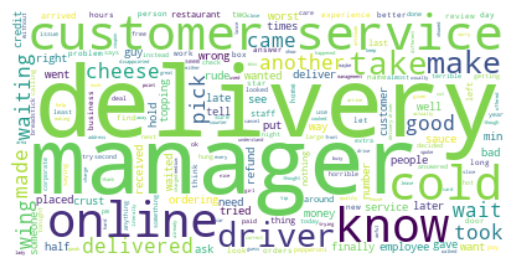

In [9]:
low_review = "".join(review for review in low_star.text)
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["food","drink","eat", "now", "pizza", "flavor", "flavors", "Dominos", "Domino", "time","told","order","ordered","called",
                  "store", "said","one","pizzas","place","give","got","call","asked","even","really","Hut","say","will","still","ready",
                 "little","caesar","Papa","John", "Johns","Caesars","go","Murphy","Sbarro","Marco","Marcos","E","Chuck","Cici","always",
                 "hour","never","first","minute","phone","minutes","back","u","come","going","us","lot","son","location"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(low_review)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('Low_star.png')
plt.show()

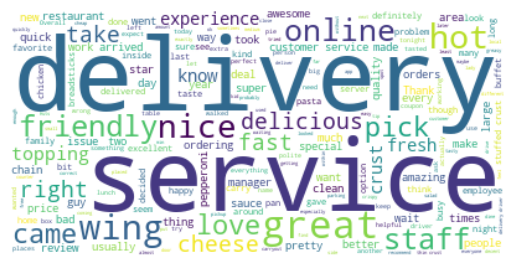

In [10]:
high_review = "".join(review for review in high_star.text)
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["food","drink","eat", "now", "pizza", "flavor", "flavors", "Dominos", "Domino", "time","told","order","ordered","called",
                  "store", "said","one","pizzas","place","give","got","call","asked","even","really","Hut","say","will","still","ready",
                 "little","caesar","Papa","John", "Johns","Caesars","go","Murphy","Sbarro","Marco","Marcos","E","Chuck","Cici","always",
                 "hour","never","first","minute","phone","minutes","back","u","come","going","us","lot","son","location","good","best","well"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(high_review)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('High_star.png')
plt.show()

In [11]:
### build some word trees by the PizzaHut_text
PizzaHut_text = "".join(review for review in PizzaHut.text)

In [18]:
all_review = PizzaHut.text
all_review = "".join(review for review in all_review )
manager_in_all= [sentence + '.' for sentence in all_review.split('.') if 'manager' in sentence]

In [19]:
 sia = SentimentIntensityAnalyzer()

In [20]:
Manager_sentiment = 0
count = 0
total = 0
for sentence in manager_in_all:
    count = count +1;
    d = sia.polarity_scores(sentence)
    value = d['compound']
    total = total + value;
float(total)/float(count)

-0.07281109589041103

In [21]:
slow_in_all= [sentence + '.' for sentence in all_review.split('.') if 'slow' in sentence]
slow_sentiment = 0
count = 0
total = 0
for sentence in slow_in_all:
    count = count +1;
    d = sia.polarity_scores(sentence)
    value = d['compound']
    total = total + value;
float(total)/float(count)

-0.08528775510204084

In [22]:
cold_in_all= [sentence + '.' for sentence in all_review.split('.') if 'cold' in sentence]
slow_sentiment = 0
count = 0
total = 0
for sentence in cold_in_all:
    count = count +1;
    d = sia.polarity_scores(sentence)
    value = d['compound']
    total = total + value;
float(total)/float(count)

-0.10906836734693878

In [23]:
###### Analyze Manager Problems
Manager_all = PizzaHut[PizzaHut['text'].str.contains("manager", na=False, case=False)==True]
Manager_all.describe().head()

,latitude,longitude,stars_x,review_count,stars_y
count,558.000000,558.000000,558.000000,558.000000,558.000000
mean,34.690957,-93.828687,1.909498,30.786738,1.410394
std,6.717172,15.614273,0.514039,16.878573,1.050792
min,28.145724,-123.182145,1.000000,5.000000,1.000000
25%,28.764685,-97.835351,1.500000,17.000000,1.000000


In [24]:
Manager_friendly = Manager_all[Manager_all['text'].str.contains("friendly", na=False, case=False)==True]
Manager_friendly.describe().head()

,latitude,longitude,stars_x,review_count,stars_y
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,33.769821,-96.555302,2.125000,29.166667,3.041667
std,7.184319,15.897177,0.368605,17.317161,1.756458
min,28.445323,-122.840356,1.500000,7.000000,1.000000
25%,28.687423,-97.884459,2.000000,17.000000,1.000000


In [39]:
#t-test
manager_score = Manager_all['stars_y']
friendly_manager_score = Manager_friendly['stars_y']
stats.ttest_ind(manager_score,friendly_manager_score, equal_var=False)

Ttest_indResult(statistic=-4.515201647713202, pvalue=0.00014612024794714024)

In [25]:
##Sentiment Score
sent_manager_all = "".join(review for review in Manager_all.text)
##get the specific sentences
manager_all_sentences= [sentence + '.' for sentence in sent_manager_all.split('.') if 'manager' in sentence]
manager_all_sentences_score = 0
count = 0
total = 0
for sentence in manager_all_sentences:
    count = count +1;
    d = sia.polarity_scores(sentence)
    value = d['compound']
    total = total + value;
float(total)/float(count)

-0.0812832641770402

In [26]:
sent_manager_friend = "".join(review for review in Manager_friendly.text)
##get the specific sentences
manager_friend_sentences= [sentence + '.' for sentence in sent_manager_friend.split('.') if 'manager' in sentence]
manager_friend_sentences_score = 0
count = 0
total = 0
for sentence in manager_friend_sentences:
    count = count +1;
    d = sia.polarity_scores(sentence)
    value = d['compound']
    total = total + value;
float(total)/float(count)

0.2634162162162162

In [27]:
###### Analyze Delivery Problems
Deliver_all = PizzaHut[PizzaHut['text'].str.contains("deliver", na=False, case=False)==True]
Deliver_all.describe().head()

,latitude,longitude,stars_x,review_count,stars_y
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000
mean,36.080816,-96.747701,1.911567,31.612741,1.749371
std,7.285517,17.080621,0.526098,16.610599,1.344284
min,28.145724,-123.210407,1.000000,5.000000,1.000000
25%,30.191863,-122.553433,1.500000,18.000000,1.000000


In [28]:
Deliver_slow = Deliver_all[Deliver_all['text'].str.contains("wait|slow" , na=False, case=False)==True]
Deliver_slow.describe().head()

,latitude,longitude,stars_x,review_count,stars_y
count,291.000000,291.000000,291.000000,291.000000,291.000000
mean,35.870278,-95.654253,1.809278,33.388316,1.329897
std,6.870631,16.365530,0.481252,17.295716,0.831139
min,28.248215,-123.182145,1.000000,5.000000,1.000000
25%,30.256702,-98.091407,1.500000,18.000000,1.000000


In [36]:
low_slow = low_star[low_star['text'].str.contains("wait|slow", na=False, case=False)==True]
low_slow.describe().head()

,latitude,longitude,stars_x,review_count,stars_y
count,633.000000,633.000000,633.000000,633.000000,633.000000
mean,35.405226,-94.131172,1.861769,31.423381,1.110585
std,6.956507,16.450010,0.527195,16.816044,0.313865
min,28.246432,-123.182145,1.000000,5.000000,1.000000
25%,28.812779,-97.844566,1.500000,18.000000,1.000000


In [40]:
#t-test
delivery_score = Deliver_all['stars_y']
delivery_slow_score = Deliver_slow['stars_y']
stats.ttest_ind(delivery_score ,delivery_slow_score, equal_var=False)

Ttest_indResult(statistic=6.726796441741874, pvalue=3.578336738027334e-11)

In [29]:
##Sentiment Score
sent_delivery_all = "".join(review for review in Deliver_all.text)
##get the specific sentences
delivery_all_sentences= [sentence + '.' for sentence in sent_delivery_all.split('.') if 'delivery' in sentence]
delivery_all_sentences_score = 0
count = 0
total = 0
for sentence in delivery_all_sentences:
    count = count +1;
    d = sia.polarity_scores(sentence)
    value = d['compound']
    total = total + value;
float(total)/float(count)

-0.007311659574468066

In [30]:
sent_delivery_slow = "".join(review for review in Deliver_slow.text)
##get the specific sentences
delivery_slow_sentences= [sentence + '.' for sentence in sent_delivery_slow.split('.') if 'slow' or 'wait' in sentence]
delivery_slow_sentences_score = 0
count = 0
total = 0
for sentence in delivery_slow_sentences:
    count = count +1;
    d = sia.polarity_scores(sentence)
    value = d['compound']
    total = total + value;
float(total)/float(count)

-0.018701167664670733

In [31]:
### Analyze Food Problems
Cold_food = PizzaHut[PizzaHut['text'].str.contains("cold", na=False, case=False)==True]
Cold_food.describe().head()

,latitude,longitude,stars_x,review_count,stars_y
count,358.000000,358.000000,358.000000,358.000000,358.000000
mean,36.734032,-97.018098,1.801676,33.086592,1.198324
std,6.914077,17.356220,0.477561,16.027140,0.632719
min,28.145724,-123.210407,1.000000,5.000000,1.000000
25%,30.353629,-122.553747,1.500000,20.000000,1.000000


In [35]:
low_cold = low_star[low_star['text'].str.contains("cold", na=False, case=False)==True]
low_cold.describe().head()

,latitude,longitude,stars_x,review_count,stars_y
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,36.691623,-96.851533,1.784682,33.187861,1.098266
std,6.854180,17.290159,0.469995,15.980313,0.298105
min,28.145724,-123.182145,1.000000,5.000000,1.000000
25%,30.353629,-122.553433,1.500000,20.000000,1.000000


In [32]:
##Sentiment Score
cold_all = "".join(review for review in Cold_food.text)
##get the specific sentences
cold_all_sentences= [sentence + '.' for sentence in cold_all.split('.') if 'cold' in sentence]
cold_all_sentences_score = 0
count = 0
total = 0
for sentence in cold_all_sentences:
    count = count +1;
    d = sia.polarity_scores(sentence)
    value = d['compound']
    total = total + value;
float(total)/float(count)

-0.096072987012987